https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
cd ..

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training


In [2]:
pwd

'C:\\Users\\KonuTech\\PycharmProjects\\mlops-zoomcamp-training'

In [3]:
import os
import json
import pickle
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [6]:
import xgboost as xgb

In [7]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [8]:
import mlflow

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [10]:
# mlflow.set_tracking_uri('sqlite:///mlflow.db')
# mlflow.set_experiment('duration-prediction-homework')

In [11]:
from IPython.display import display, HTML
import warnings

In [12]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

## Module 1.

In [13]:
CONFIG = 'config.json'

In [14]:
TRAIN = 'yellow_tripdata_2022-01.parquet'

In [15]:
TEST = 'yellow_tripdata_2022-02.parquet'

In [16]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TRAIN = os.path.join(os.getcwd(), 'INPUTS', TRAIN)

# Print the file path
print(FILE_PATH_TRAIN)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-01.parquet


In [17]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TEST = os.path.join(os.getcwd(), 'INPUTS', TEST)

# Print the file path
print(FILE_PATH_TEST)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-02.parquet


In [18]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\CONFIGS\config.json


In [19]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [20]:
df = pd.read_parquet(FILE_PATH_TRAIN)

In [21]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [23]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [24]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 46.44530513776802


In [25]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [26]:
df.loc[((df.duration >= 1) & (df.duration <= 60)), 'duration'].mean()

12.671278846471523

In [27]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00,37.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN,5.97
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN,10.65
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN,11.00
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN,12.05


In [28]:
2421440 / 2463931 

0.9827547930522406

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [30]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 8.99928164030397


In [31]:
# train_dicts = df[categorical + numerical].to_dict(orient='records')

In [32]:
train_dicts = df[categorical].to_dict(orient='records')

In [33]:
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '229'},
 {'PULocationID': '114', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '113'},
 {'PULocationID': '246', 'DOLocationID': '79'},
 {'PULocationID': '43', 'DOLocationID': '140'},
 {'PULocationID': '239', 'DOLocationID': '151'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '237', 'DOLocationID': '107'},
 {'PULocationID': '7', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DOLoc

In [34]:
dv = DictVectorizer()

In [35]:
X_train = dv.fit_transform(train_dicts)

In [36]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

In [37]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [38]:
len(dv.feature_names_)

515

In [39]:
target = 'duration'
y_train = df[target].values

In [40]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

In [43]:
mean_squared_error(y_train, y_pred, squared=False)

6.986190841034851

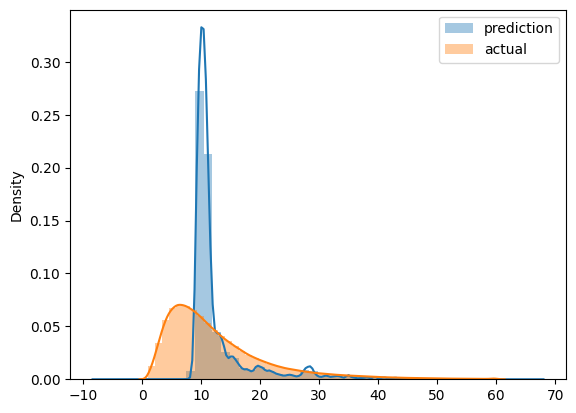

In [44]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [45]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [46]:
df_train = read_dataframe(FILE_PATH_TRAIN)
df_val = read_dataframe(FILE_PATH_TEST)

In [47]:
len(df_train), len(df_val)

(2421440, 2918187)

##### preprocessing

In [48]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [50]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918187 entries, 0 to 2979430
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [51]:
df_val['PULocationID'].unique()

array(['138', '239', '140', '48', '142', '238', '132', '143', '234',
       '233', '186', '79', '249', '107', '164', '151', '263', '229', '68',
       '230', '237', '100', '170', '144', '162', '148', '137', '141',
       '224', '161', '90', '7', '163', '43', '211', '114', '74', '113',
       '125', '244', '50', '231', '87', '264', '41', '17', '246', '75',
       '42', '70', '260', '129', '40', '158', '236', '181', '88', '166',
       '4', '24', '116', '226', '262', '65', '232', '173', '152', '45',
       '256', '13', '209', '225', '261', '168', '190', '265', '216',
       '134', '55', '135', '14', '39', '212', '235', '191', '38', '61',
       '243', '10', '242', '210', '248', '51', '112', '195', '11', '37',
       '146', '69', '53', '127', '218', '182', '155', '19', '33', '145',
       '179', '215', '197', '247', '223', '77', '177', '66', '157', '9',
       '139', '193', '102', '21', '205', '63', '213', '254', '131', '91',
       '95', '241', '189', '97', '159', '200', '78', '119', '13

In [52]:
len(df_val['PULocationID'].unique())

254

In [53]:
len(df_val['DOLocationID'].unique())

260

In [54]:
len(df_val['PULocationID'].unique()) + len(df_val['DOLocationID'].unique())

514

In [55]:
dv = DictVectorizer()

In [56]:
dv

DictVectorizer()

In [57]:
# train_dicts = df_train[categorical + numerical].to_dict(orient='records')
# train_dicts

In [58]:
train_dicts = df_train[categorical].to_dict(orient='records')
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '229'},
 {'PULocationID': '114', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '113'},
 {'PULocationID': '246', 'DOLocationID': '79'},
 {'PULocationID': '43', 'DOLocationID': '140'},
 {'PULocationID': '239', 'DOLocationID': '151'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '237', 'DOLocationID': '107'},
 {'PULocationID': '7', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DOLoc

In [59]:
len(train_dicts)

2421440

In [60]:
len(train_dicts[0])

2

In [61]:
X_train = dv.fit_transform(train_dicts)

before: (2421440, 20667)

In [62]:
X_train.shape

(2421440, 515)

In [63]:
# val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [64]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [65]:
len(val_dicts)

2918187

In [66]:
X_val = dv.transform(val_dicts)

In [67]:
X_val.shape

(2918187, 515)

In [68]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [69]:
y_train.shape, y_val.shape

((2421440,), (2918187,))

##### training LR

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(X_val)

In [72]:
mean_squared_error(y_val, y_pred, squared=False)

7.786408695263233

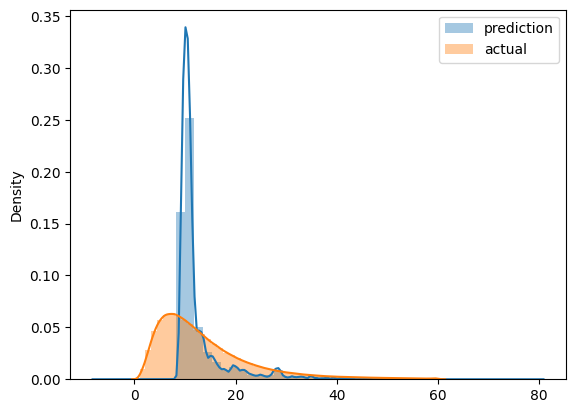

In [73]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [74]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [75]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

Lasso(alpha=0.01)

In [76]:
y_pred = lr.predict(X_val)

In [77]:
mean_squared_error(y_val, y_pred, squared=False)

8.116069832221214

## Module 2.

In [79]:
X_train[:10]

<10x515 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [80]:
X_train.shape

(2421440, 515)

In [81]:
y_train.shape

(2421440,)

In [82]:
X_val.shape

(2918187, 515)

In [83]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('duration-prediction-homework')

<Experiment: artifact_location='file:///C:/Users/KonuTech/PycharmProjects/mlops-zoomcamp-training/mlruns/1', creation_time=1684307915748, experiment_id='1', last_update_time=1684307915748, lifecycle_stage='active', name='duration-prediction-homework', tags={}>

##### training 50 models

In [ ]:
with mlflow.start_run():

    mlflow.set_tag('developer', 'Konrad')
    mlflow.log_param('train-data-path', 'yellow_tripdata_2022-01.parquet')
    mlflow.log_param('valid-data-path', 'yellow_tripdata_2022-02.parquet')
    
    alpha = 0.1
    mlflow.log_param('alpha', alpha)
    
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    

In [ ]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [ ]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0), # exp(-3), exp(0) -> [0.05, 1]
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

In [ ]:
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

##### Training champion

In [88]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('duration-prediction-homework')

<Experiment: artifact_location='file:///C:/Users/KonuTech/PycharmProjects/mlops-zoomcamp-training/mlruns/1', creation_time=1684307915748, experiment_id='1', last_update_time=1684307915748, lifecycle_stage='active', name='duration-prediction-homework', tags={}>

In [89]:
# mlflow.xgboost.autolog(disable=True)

In [90]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)
    
    best_params = {
        'learning_rate': 0.2027270019188835,
        'max_depth': 11,
        'min_child_weight': 9.498814078399025,
        'objective': 'reg:linear',
        'reg_alpha': 0.05903805330249986,
        'reg_lambda': 0.026935158747484356,
        'seed': 42
    }

#     mlflow.xgboost.autolog()
    
    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )
    
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    
    with open('models/preprocessor.b', 'wb') as f_out:
        pickle.dump(dv, f_out)

    mlflow.log_artifact('models/preprocessor.b', artifact_path='preprocessor')
    
    mlflow.xgboost.log_model(booster, artifact_path='models_mlflow')
    


[09:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:14.18018
[1]	validation-rmse:12.49919
[2]	validation-rmse:11.25165
[3]	validation-rmse:10.34118
[4]	validation-rmse:9.68031
[5]	validation-rmse:9.18995
[6]	validation-rmse:8.84421
[7]	validation-rmse:8.59053
[8]	validation-rmse:8.38655
[9]	validation-rmse:8.24079
[10]	validation-rmse:8.13884
[11]	validation-rmse:8.05849
[12]	validation-rmse:7.99335
[13]	validation-rmse:7.93098
[14]	validation-rmse:7.89227
[15]	validation-rmse:7.81282
[16]	validation-rmse:7.78208
[17]	validation-rmse:7.75714
[18]	validation-rmse:7.70276
[19]	validation-rmse:7.67955
[20]	validation-rmse:7.62657
[21]	validation-rmse:7.61040
[22]	validation-rmse:7.59187
[23]	validation-rmse:7.57076
[24]	validation-rmse:7.54597
[25]	validation-rmse:7.53505
[26]	validation-rmse:

[269]	validation-rmse:6.30216
[270]	validation-rmse:6.28826
[271]	validation-rmse:6.27548
[272]	validation-rmse:6.27206
[273]	validation-rmse:6.27018
[274]	validation-rmse:6.26960
[275]	validation-rmse:6.26924
[276]	validation-rmse:6.26878
[277]	validation-rmse:6.26860
[278]	validation-rmse:6.26707
[279]	validation-rmse:6.26616
[280]	validation-rmse:6.26604
[281]	validation-rmse:6.26522
[282]	validation-rmse:6.26480
[283]	validation-rmse:6.26329
[284]	validation-rmse:6.26225
[285]	validation-rmse:6.25807
[286]	validation-rmse:6.25800
[287]	validation-rmse:6.25695
[288]	validation-rmse:6.25613
[289]	validation-rmse:6.25583
[290]	validation-rmse:6.25522
[291]	validation-rmse:6.25111
[292]	validation-rmse:6.23755
[293]	validation-rmse:6.22658
[294]	validation-rmse:6.21506
[295]	validation-rmse:6.19971
[296]	validation-rmse:6.18928
[297]	validation-rmse:6.18631
[298]	validation-rmse:6.18501
[299]	validation-rmse:6.17991
[300]	validation-rmse:6.17407
[301]	validation-rmse:6.16742
[302]	vali

[543]	validation-rmse:5.80328
[544]	validation-rmse:5.80162
[545]	validation-rmse:5.80135
[546]	validation-rmse:5.80058
[547]	validation-rmse:5.80011
[548]	validation-rmse:5.79990
[549]	validation-rmse:5.79979
[550]	validation-rmse:5.79974
[551]	validation-rmse:5.79970
[552]	validation-rmse:5.79961
[553]	validation-rmse:5.79680
[554]	validation-rmse:5.79635
[555]	validation-rmse:5.79603
[556]	validation-rmse:5.79514
[557]	validation-rmse:5.79246
[558]	validation-rmse:5.79082
[559]	validation-rmse:5.79046
[560]	validation-rmse:5.79006
[561]	validation-rmse:5.78875
[562]	validation-rmse:5.78869
[563]	validation-rmse:5.78853
[564]	validation-rmse:5.78805
[565]	validation-rmse:5.78793
[566]	validation-rmse:5.78792
[567]	validation-rmse:5.78730
[568]	validation-rmse:5.78522
[569]	validation-rmse:5.78317
[570]	validation-rmse:5.78312
[571]	validation-rmse:5.78289
[572]	validation-rmse:5.78286
[573]	validation-rmse:5.78280
[574]	validation-rmse:5.78261
[575]	validation-rmse:5.78158
[576]	vali

[817]	validation-rmse:5.71916
[818]	validation-rmse:5.71916
[819]	validation-rmse:5.71911
[820]	validation-rmse:5.71908
[821]	validation-rmse:5.71905
[822]	validation-rmse:5.71898
[823]	validation-rmse:5.71870
[824]	validation-rmse:5.71860
[825]	validation-rmse:5.71858
[826]	validation-rmse:5.71857
[827]	validation-rmse:5.71852
[828]	validation-rmse:5.71831
[829]	validation-rmse:5.71800
[830]	validation-rmse:5.71800
[831]	validation-rmse:5.71794
[832]	validation-rmse:5.71788
[833]	validation-rmse:5.71786
[834]	validation-rmse:5.71786
[835]	validation-rmse:5.71781
[836]	validation-rmse:5.71780
[837]	validation-rmse:5.71779
[838]	validation-rmse:5.71776
[839]	validation-rmse:5.71667
[840]	validation-rmse:5.71598
[841]	validation-rmse:5.71546
[842]	validation-rmse:5.71490
[843]	validation-rmse:5.71431
[844]	validation-rmse:5.71349
[845]	validation-rmse:5.71280
[846]	validation-rmse:5.71136
[847]	validation-rmse:5.71071
[848]	validation-rmse:5.71041
[849]	validation-rmse:5.70972
[850]	vali

##### Loading champion

In [92]:
import mlflow
logged_model = 'runs:/93012312da5545cfb0f3d3ded7ec7c85/models_mlflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
# import pandas as pd
# loaded_model.predict(pd.DataFrame(data))

2023/05/18 09:32:18 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.3.2, required: mlflow==2.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


[09:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: 93012312da5545cfb0f3d3ded7ec7c85

In [94]:
xgboost_model = mlflow.xgboost.load_model('runs:/93012312da5545cfb0f3d3ded7ec7c85/models_mlflow')

[09:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [95]:
y_pred = xgboost_model.predict(valid)

In [96]:
y_pred[:10]

array([14.537514 , 20.422081 , 26.920662 , 20.851164 , 30.479057 ,
       13.334557 , 28.969824 ,  6.2149477, 18.587307 , 14.6224575],
      dtype=float32)

In [97]:
# Retrieve feature importance information
importance_scores = xgboost_model.get_score(importance_type='weight')

# Sort the scores in descending order
sorted_indices = np.argsort(list(importance_scores.values()))[::-1]
sorted_scores = np.array(list(importance_scores.values()))[sorted_indices]

# Get the corresponding feature names
feature_names = list(importance_scores.keys())

# Print the selected variables and their importance scores
for feature, score in zip(feature_names, sorted_scores):
    print(f"Feature: {feature}, Importance Score: {score}")

Feature: f0, Importance Score: 2692.0
Feature: f1, Importance Score: 2351.0
Feature: f2, Importance Score: 691.0
Feature: f3, Importance Score: 639.0
Feature: f4, Importance Score: 560.0
Feature: f6, Importance Score: 547.0
Feature: f7, Importance Score: 468.0
Feature: f8, Importance Score: 462.0
Feature: f9, Importance Score: 438.0
Feature: f10, Importance Score: 430.0
Feature: f11, Importance Score: 403.0
Feature: f12, Importance Score: 401.0
Feature: f13, Importance Score: 388.0
Feature: f14, Importance Score: 386.0
Feature: f15, Importance Score: 381.0
Feature: f16, Importance Score: 376.0
Feature: f17, Importance Score: 367.0
Feature: f18, Importance Score: 366.0
Feature: f19, Importance Score: 359.0
Feature: f20, Importance Score: 353.0
Feature: f21, Importance Score: 350.0
Feature: f22, Importance Score: 346.0
Feature: f23, Importance Score: 340.0
Feature: f24, Importance Score: 337.0
Feature: f25, Importance Score: 320.0
Feature: f26, Importance Score: 319.0
Feature: f27, Impor

In [98]:
len(list(importance_scores.keys()))

484

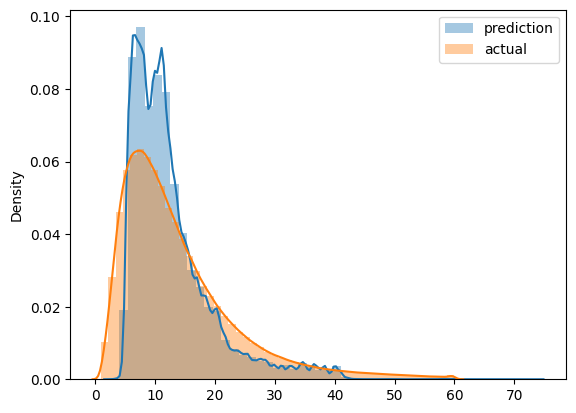

In [99]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()